In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load in data (since the comp is over, using the train as test doesn't have target variable)
df = pd.read_csv("train.csv")


In [3]:
# what does it all look like?
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


## EDA

In [4]:
# what are the patterns and distributions within the numerical cols?
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [6]:
#the capital in residence type is annoying, let's rename
df.rename(columns ={"Residence_type" : "residence_type"}, inplace = True)

In [7]:
# while some columns are integers, it looks like they are binary, 0 or 1
#create two lists, of categorical or numerical to make them easier to analyse
cat_var = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "residence_type", "smoking_status", "stroke"]
num_var = ["age", "avg_glucose_level", "bmi"]

gender:
Female    0.617224
Male      0.382710
Other     0.000065
Name: gender, dtype: float64 



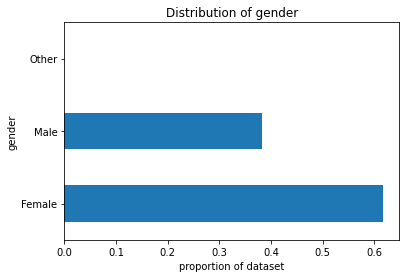

hypertension:
0    0.950274
1    0.049726
Name: hypertension, dtype: float64 



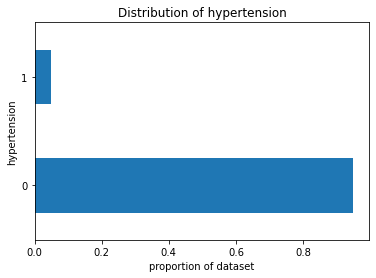

heart_disease:
0    0.976673
1    0.023327
Name: heart_disease, dtype: float64 



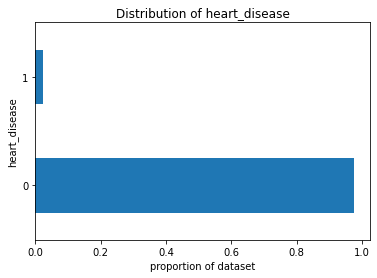

ever_married:
Yes    0.678581
No     0.321419
Name: ever_married, dtype: float64 



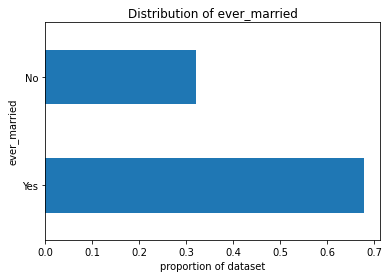

work_type:
Private          0.637219
children         0.133168
Self-employed    0.126699
Govt_job         0.100170
Never_worked     0.002744
Name: work_type, dtype: float64 



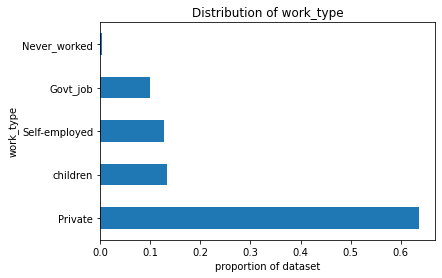

residence_type:
Rural    0.500784
Urban    0.499216
Name: residence_type, dtype: float64 



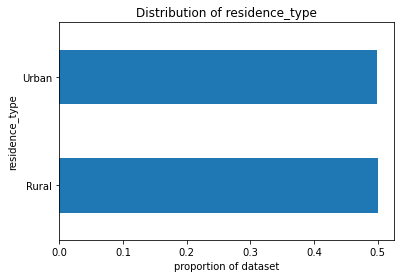

smoking_status:
never smoked       0.410416
Unknown            0.296850
formerly smoked    0.152705
smokes             0.140029
Name: smoking_status, dtype: float64 



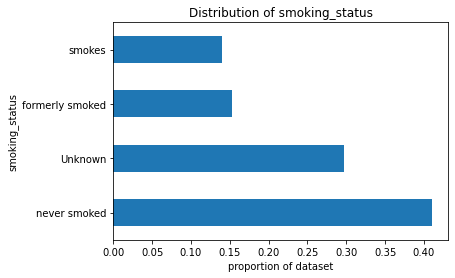

stroke:
0    0.958704
1    0.041296
Name: stroke, dtype: float64 



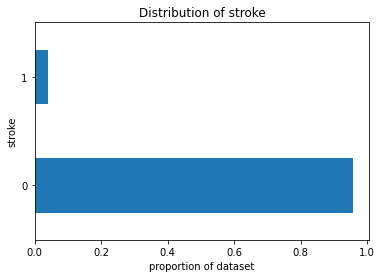

In [8]:
# loop through the categorical variables to plot distributions
for col in cat_var:
    print(f"{col}:")
    print(df[col].value_counts(normalize = True), "\n")
    ax = df[col].value_counts(normalize = True).plot(kind = 'barh')
    ax.set(title = f"Distribution of {col}", xlabel = "proportion of dataset", ylabel = f"{col}")
    plt.show();

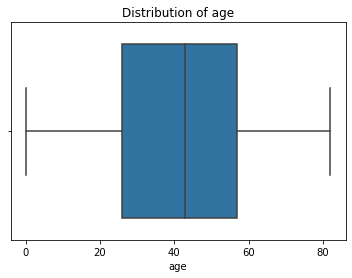

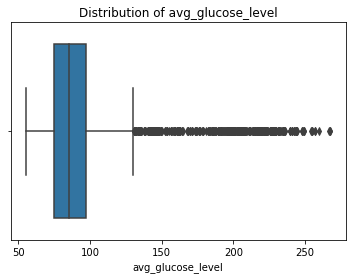

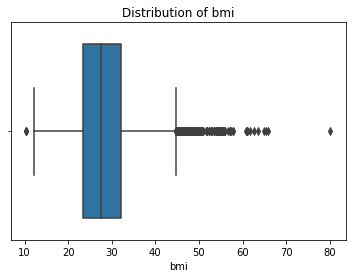

In [9]:
# and the same for the numerical cols
for col in num_var:
    sns.boxplot(data = df, x = col)
    plt.title(f"Distribution of {col}")
    plt.show();

### Quick take-aways on the plotting

Categorical columns (binarise or dummify):

- Gender primarily female (over 60%)
- Hypertension: predominantly (95%) not hypertensive
- Heart disease: similarly majority (97%) do not have heart disease
- Rural and urban living is a 50:50 split
- Quite a few unknowns in smoking!
 
 
Numerical columns (standardise):

- Age is pretty well spread, with a relatively balanced age range and the majority between 30 and 60 years.  However it also has a lot of children (see further EDA below)
- Both BMI and glucose level have some very high outliers.  However, these should not be treated as errors since (with a bit of googling) it seems it is possible to have these results.  Also, if they are correct then they are real people and real data, meaning they are something we want our model to deal with.


### Biggest takeaway:

- The dataset, with the perspective of the target variable, is very heavily imbalanced. Almost 96% of the dataset is class 0, so we will have to resample it at some stage before applying any ML algorithms


In [10]:
df[df.bmi > 70]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
4295,4295,Female,52.0,0,0,Yes,Self-employed,Urban,84.54,80.1,Unknown,0


is that real?? a BMI of over 80?  In 15 years of working with obese clients and operating NHS contracts, the highest BMI I ever encountered was 42...
At a height of 160cm, that would put her weighing in at 200+ kg!


In [11]:
df[df.bmi < 15]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
12,12,Female,4.00,0,0,No,children,Urban,84.10,14.1,Unknown,0
242,242,Female,5.00,0,0,No,children,Rural,86.98,14.2,Unknown,0
703,703,Male,10.00,0,0,No,children,Rural,94.49,14.6,Unknown,0
1554,1554,Female,11.00,0,0,No,children,Urban,68.35,14.1,Unknown,0
1857,1857,Female,1.80,0,0,No,children,Urban,130.61,14.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14984,14984,Male,0.32,0,0,No,children,Rural,94.75,14.4,Unknown,0
14993,14993,Female,2.00,0,0,No,children,Rural,93.51,14.5,Unknown,0
14995,14995,Male,6.00,0,0,No,children,Urban,78.38,14.1,Unknown,0
15295,15295,Male,12.00,0,0,No,children,Urban,69.78,14.3,never smoked,0


A lot of the observations with what would normally be considered a low BMI are children.  The BMI scale for children is actually quite different.  Generally in adults 20-25 is considered the healthy range.  But in children 20 is overweight.
There's also a lot of 'unknown' for smoking status which is concerning.  For example, in the subset above, there's a male infant (id 14984) approx3 months old whose smoking status is unknown.  It's either concerning, or poor data input/form filling.

In [12]:
kids = df[df.age<16]
kids.stroke.value_counts()

0    2208
1       1
Name: stroke, dtype: int64

In [13]:
kids["smoking_status"].value_counts()

Unknown            1950
never smoked        221
formerly smoked      35
smokes                3
Name: smoking_status, dtype: int64

In [14]:
df["smoking_status"].value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

Half of the unknowns for smoking status are from under 16s.  Since it is very unlikely that under 16s are smokers (based on the rest of the data) and it is just poor entry, we could come back and impute these later

In [15]:
kids[kids["smoking_status"]=="smokes"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
7848,7848,Female,14.0,0,0,No,children,Urban,107.47,23.8,smokes,0
13890,13890,Female,10.0,0,0,No,children,Urban,94.39,43.0,smokes,0
14774,14774,Female,14.0,0,0,No,children,Rural,110.99,21.0,smokes,0


In [16]:
kids[kids["smoking_status"]=="formerly smoked"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1858,1858,Female,13.00,0,0,No,children,Urban,114.82,22.4,formerly smoked,0
1896,1896,Male,12.00,0,0,No,children,Rural,110.22,20.4,formerly smoked,0
1948,1948,Female,14.00,0,0,No,children,Urban,104.11,37.6,formerly smoked,0
2662,2662,Male,14.00,0,0,No,Private,Urban,87.86,24.7,formerly smoked,0
2885,2885,Male,15.00,0,0,No,Never_worked,Rural,112.09,22.2,formerly smoked,0
3917,3917,Female,13.00,0,0,No,Private,Urban,75.78,23.4,formerly smoked,0
4596,4596,Female,10.00,0,0,No,children,Urban,101.75,26.4,formerly smoked,0
5089,5089,Female,10.00,0,0,No,children,Urban,62.08,17.0,formerly smoked,0
5129,5129,Male,14.00,1,0,No,children,Rural,80.08,15.6,formerly smoked,0
5501,5501,Female,14.00,0,0,No,Private,Rural,83.42,22.7,formerly smoked,0


There's a 2 year old and a 1.88 year old who are both listed as former smokers?? Is this a different interpretation of the meaning? Were they formerly passive smokers?

In [17]:
kids[kids.stroke == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3226,3226,Male,10.0,0,0,No,children,Urban,93.28,18.4,Unknown,1


In [18]:
kids[kids["ever_married"] == "Yes"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
4155,4155,Female,0.08,0,0,Yes,Private,Urban,79.33,33.2,Unknown,0
8102,8102,Female,1.32,1,0,Yes,Self-employed,Urban,167.41,33.6,never smoked,0
8451,8451,Female,10.00,0,0,Yes,children,Urban,78.03,35.4,formerly smoked,0
9068,9068,Female,5.00,0,0,Yes,Private,Rural,108.14,23.1,never smoked,0
14852,14852,Male,9.00,0,0,Yes,Private,Urban,89.74,17.1,Unknown,0


Yet more weird data for children.  There's a 1.3 year old (16months) who is self employed.  So either bad data entry, a random child star or a tax write off by a tax savy parent??  Although the fact she has high blood pressue suggests to me maybe she is self employed in show business?(!)

However more concerning is that 6 under 11s have all been married.  That scares me and in some cases it could be child brides or it could be poor data entry.

## Feature engineering

Some of our features need to be adapted or modified before ML models can utilise them: 

Gender, work type and smoking status need to be dummified

Ever married and residence can be binarised

Age, glucose level and BMI need to be standardised to deal with the different units

In [19]:
# dummify gender work type and smoking status
dummy_cols = ["gender", "work_type", "smoking_status"]

df = pd.get_dummies(df, columns = dummy_cols, drop_first = True)
df.head()

,id,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,28.0,0,0,Yes,Urban,79.53,31.1,0,1,0,0,1,0,0,0,1,0
1,1,33.0,0,0,Yes,Rural,78.44,23.9,0,1,0,0,1,0,0,1,0,0
2,2,42.0,0,0,Yes,Rural,103.00,40.3,0,0,0,0,1,0,0,0,0,0
3,3,56.0,0,0,Yes,Urban,64.87,28.8,0,1,0,0,1,0,0,0,1,0
4,4,24.0,0,0,No,Rural,73.36,28.8,0,0,0,0,1,0,0,0,1,0


In [20]:
# binarise

def bin_res(x):
    if x == "Urban":
        return(1)
    else:
        return(0)

df["urban_residence"] = df["residence_type"].apply(bin_res)

def bin_married(x):
    if x == "Yes":
        return(1)
    else:
        return(0)

df["ever_married"] = df["ever_married"].apply(bin_married)

df.head()

,id,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,urban_residence
0,0,28.0,0,0,1,Urban,79.53,31.1,0,1,0,0,1,0,0,0,1,0,1
1,1,33.0,0,0,1,Rural,78.44,23.9,0,1,0,0,1,0,0,1,0,0,0
2,2,42.0,0,0,1,Rural,103.00,40.3,0,0,0,0,1,0,0,0,0,0,0
3,3,56.0,0,0,1,Urban,64.87,28.8,0,1,0,0,1,0,0,0,1,0,1
4,4,24.0,0,0,0,Rural,73.36,28.8,0,0,0,0,1,0,0,0,1,0,0


In [21]:
#drop id and residence type

df.drop(columns = ["id", "residence_type"], inplace = True)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,urban_residence
0,28.0,0,0,1,79.53,31.1,0,1,0,0,1,0,0,0,1,0,1
1,33.0,0,0,1,78.44,23.9,0,1,0,0,1,0,0,1,0,0,0
2,42.0,0,0,1,103.00,40.3,0,0,0,0,1,0,0,0,0,0,0
3,56.0,0,0,1,64.87,28.8,0,1,0,0,1,0,0,0,1,0,1
4,24.0,0,0,0,73.36,28.8,0,0,0,0,1,0,0,0,1,0,0


In [22]:
# create X_train, y_train, X_test, y_test:
from sklearn.model_selection import train_test_split

y = df.pop("stroke")
X = df

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12243, 16) (12243,)
(3061, 16) (3061,)


In [23]:
#Scale age, glucose and BMI

from sklearn.preprocessing import StandardScaler

#scaled cols
scale_cols = ["age", "avg_glucose_level", "bmi"]

#Instantiate scaler
scaler = StandardScaler()

#fit and stransform on training data
scaler.fit(X_train[scale_cols])
X_train[scale_cols] = scaler.transform(X_train[scale_cols])

#transform on test data
X_test[scale_cols] = scaler.transform(X_test[scale_cols])



In [24]:
X_test.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,urban_residence
4374,-1.324705,0,0,0,1.301085,-0.777306,1,0,0,0,0,1,0,0,0,1
5155,0.402624,0,0,1,-0.438961,-0.050493,0,0,0,1,0,0,0,1,0,0
7500,-0.904544,0,0,0,1.023619,-1.014632,0,0,0,0,0,0,0,0,0,0
4624,0.449309,0,1,1,-0.277889,0.616988,0,0,0,1,0,0,1,0,0,1
9094,0.449309,0,0,1,-1.117343,-0.258154,0,0,0,0,1,0,0,1,0,0


In [25]:
X_test.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,urban_residence
4374,-1.324705,0,0,0,1.301085,-0.777306,1,0,0,0,0,1,0,0,0,1
5155,0.402624,0,0,1,-0.438961,-0.050493,0,0,0,1,0,0,0,1,0,0
7500,-0.904544,0,0,0,1.023619,-1.014632,0,0,0,0,0,0,0,0,0,0
4624,0.449309,0,1,1,-0.277889,0.616988,0,0,0,1,0,0,1,0,0,1
9094,0.449309,0,0,1,-1.117343,-0.258154,0,0,0,0,1,0,0,1,0,0


## Adasyn

Before we fit a model, we'll want to somehow deal with the imbalance in the dataset.  We can use ADASYN to synthetically create new data for the minority class.

In [26]:
from imblearn.over_sampling import ADASYN

#instantiate ADASYN
adasyn = ADASYN(random_state = 3, sampling_strategy = 'minority')
#resample with ADASYN and create new X and y
X_train, y_train = adasyn.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)

(23452, 16) (23452,)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, PrecisionRecallDisplay,  average_precision_score, precision_recall_curve, auc, plot_precision_recall_curve

In [31]:
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
ada = AdaBoostClassifier()
extra = ExtraTreesClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()

In [32]:
tree.fit(X_train, y_train)
print("accuracy score on train data :", tree.score(X_train, y_train))
print("cross val scores on train data :", cross_val_score(tree, X_train, y_train, cv = 5))
print("mean cross val score :", cross_val_score(tree, X_train, y_train, cv = 5).mean())
y_pred = tree.predict(X_test)
print(average_precision_score(y_test, y_pred))

accuracy score on train data : 1.0
cross val scores on train data : [0.88701769 0.9629077  0.9315565  0.90234542 0.9196162 ]
mean cross val score : 0.9181301035099194
0.06604363224961779


In [33]:
forest.fit(X_train, y_train)
print("accuracy score on train data :", forest.score(X_train, y_train))
print("cross val scores on train data :", cross_val_score(forest, X_train, y_train, cv = 5))
print("mean cross val score :", cross_val_score(forest, X_train, y_train, cv = 5).mean())
y_pred = forest.predict(X_test)
print(average_precision_score(y_test, y_pred))

accuracy score on train data : 1.0
cross val scores on train data : [0.88850991 0.92155191 0.8989339  0.88102345 0.89872068]
mean cross val score : 0.8983876942600698
0.06989709429085167


In [34]:
ada.fit(X_train, y_train)
print("accuracy score on train data :", ada.score(X_train, y_train))
print("cross val scores on train data :", cross_val_score(ada, X_train, y_train, cv = 5))
print("mean cross val score :", cross_val_score(ada, X_train, y_train, cv = 5).mean())
y_pred = ada.predict(X_test)
print(average_precision_score(y_test, y_pred))

accuracy score on train data : 0.8244925805901415
cross val scores on train data : [0.80345342 0.84331699 0.81791045 0.80063966 0.82878465]
mean cross val score : 0.8188210332447152
0.10618217777903839


In [35]:
extra.fit(X_train, y_train)
print("accuracy score on train data :", extra.score(X_train, y_train))
print("cross val scores on train data :", cross_val_score(extra, X_train, y_train, cv = 5))
print("mean cross val score :", cross_val_score(extra, X_train, y_train, cv = 5).mean())
y_pred = extra.predict(X_test)
print(average_precision_score(y_test, y_pred))

accuracy score on train data : 1.0
cross val scores on train data : [0.88040929 0.90577702 0.88251599 0.87185501 0.8891258 ]
mean cross val score : 0.8871305803109797
0.06896259571855781


In [36]:
lr.fit(X_train, y_train)
print("accuracy score on train data :", lr.score(X_train, y_train))
print("cross val scores on train data :", cross_val_score(lr, X_train, y_train, cv = 5))
print("mean cross val score :", cross_val_score(lr, X_train, y_train, cv = 5).mean())
y_pred = lr.predict(X_test)
print(average_precision_score(y_test, y_pred))

accuracy score on train data : 0.8048780487804879
cross val scores on train data : [0.77275634 0.82370497 0.81897655 0.79211087 0.80810235]
mean cross val score : 0.8031302148695569
0.1168388326603061


In [37]:
knn.fit(X_train, y_train)
print("accuracy score on train data :", knn.score(X_train, y_train))
print("cross val scores on train data :", cross_val_score(knn, X_train, y_train, cv = 5))
print("mean cross val score :", cross_val_score(knn, X_train, y_train, cv = 5).mean())
y_pred = knn.predict(X_test)
print(average_precision_score(y_test, y_pred))

/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy score on train data : 0.9356558076070272


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

cross val scores on train data : [0.86271584 0.87913025 0.87462687 0.85373134 0.87270789]


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

mean cross val score : 0.8685824372670254
0.06875089105381818


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
gbc.fit(X_train, y_train)
print("accuracy score on train data :", gbc.score(X_train, y_train))
print("cross val scores on train data :", cross_val_score(gbc, X_train, y_train, cv = 5))
print("mean cross val score :", cross_val_score(gbc, X_train, y_train, cv = 5).mean())
y_pred = gbc.predict(X_test)
print(average_precision_score(y_test, y_pred))

accuracy score on train data : 0.8838478594576156
cross val scores on train data : [0.85738648 0.886165   0.87377399 0.84818763 0.87313433]
mean cross val score : 0.8677294860775454
0.09836216756352087


In [39]:
xgb.fit(X_train, y_train)
print("accuracy score on train data :", xgb.score(X_train, y_train))
print("cross val scores on train data :", cross_val_score(xgb, X_train, y_train, cv = 5))
print("mean cross val score :", cross_val_score(xgb, X_train, y_train, cv = 5).mean())
y_pred = xgb.predict(X_test)
print(average_precision_score(y_test, y_pred))

accuracy score on train data : 0.9868241514582978
cross val scores on train data : [0.90002132 0.97697719 0.97121535 0.94626866 0.96780384]
mean cross val score : 0.9524572708525467
0.08234572318568108
